# z-score를 이용한 이상치 제거
- |z-score| > 2 인 경우 이상치로 보고 제거

In [4]:
data = pd.read_csv('htn_dm.csv')
data.head()

,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
0,1,1,116,78,94,4,16.6,38,0,0
1,1,1,100,60,79,4,22.3,40,0,0
2,1,1,100,60,87,4,21.9,40,0,0
3,1,1,111,70,72,4,20.2,41,0,0
4,1,1,120,80,98,4,20.0,40,0,0


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats

In [6]:
features = data[['sex','age','sbp','dbp','fbs','bmi','ppr']]
features.head()

,sex,age,sbp,dbp,fbs,bmi,ppr
0,1,1,116,78,94,16.6,38
1,1,1,100,60,79,22.3,40
2,1,1,100,60,87,21.9,40
3,1,1,111,70,72,20.2,41
4,1,1,120,80,98,20.0,40


In [7]:
features.columns = ['sex1', 'age1','sbp1','dbp1','fbs1','bmi1','ppr1']
features.head()

,sex1,age1,sbp1,dbp1,fbs1,bmi1,ppr1
0,1,1,116,78,94,16.6,38
1,1,1,100,60,79,22.3,40
2,1,1,100,60,87,21.9,40
3,1,1,111,70,72,20.2,41
4,1,1,120,80,98,20.0,40


In [8]:
scaler = StandardScaler()

scaler.fit(features)

StandardScaler()

In [9]:
features_scaled = scaler.transform(features)

In [10]:
df_features_scaled = pd.DataFrame(data=features_scaled, columns = ['sex1','age1','sbp1','dbp1','fbs1','bmi1','ppr1'])

In [11]:
df_scaled = df_features_scaled.join(data)
df_scaled.head()

,sex1,age1,sbp1,dbp1,fbs1,bmi1,ppr1,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
0,-0.979751,-1.841916,-0.403233,0.225879,-0.211669,-2.184837,-0.824905,1,1,116,78,94,4,16.6,38,0,0
1,-0.979751,-1.841916,-1.502006,-1.612092,-0.864374,-0.456142,-0.620819,1,1,100,60,79,4,22.3,40,0,0
2,-0.979751,-1.841916,-1.502006,-1.612092,-0.516265,-0.577454,-0.620819,1,1,100,60,87,4,21.9,40,0,0
3,-0.979751,-1.841916,-0.746600,-0.590997,-1.168970,-1.093029,-0.518776,1,1,111,70,72,4,20.2,41,0,0
4,-0.979751,-1.841916,-0.128540,0.430098,-0.037614,-1.153685,-0.620819,1,1,120,80,98,4,20.0,40,0,0


In [12]:
print('feature 들의 평균 값')
print(df_features_scaled.mean())
print('\nfeature 들의 분산 값')
print(df_features_scaled.var())


feature 들의 평균 값
sex1   -3.806366e-12
age1    7.733969e-13
sbp1    6.312620e-14
dbp1   -1.194095e-13
fbs1   -6.791888e-15
bmi1    8.355301e-14
ppr1   -1.020131e-13
dtype: float64

feature 들의 분산 값
sex1    1.000001
age1    1.000001
sbp1    1.000001
dbp1    1.000001
fbs1    1.000001
bmi1    1.000001
ppr1    1.000001
dtype: float64


C:\Users\LSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LSH\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


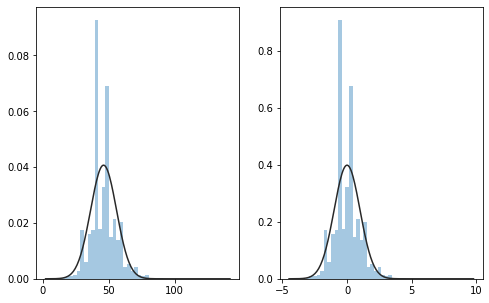

In [13]:
# 각 값들의 정규 분포 모양 비교비교 
f,ax = plt.subplots(1,2,figsize=(8,5))

# 표준화 전 정규분포 
x0 = data['ppr'].values
sns.distplot(x0, kde=False, rug=False, fit =sp.stats.norm, ax = ax[0]) #커널 밀도 함수, 러그밀도함수 는 안보이고(False) / 정규분포만 보이게(Fit)

# 표준화 이후 정규 분포 
x1 = df_scaled['ppr1'].values
sns.distplot(x1, kde=False, rug=False, fit =sp.stats.norm, ax = ax[1]) 
plt.show()

In [14]:
df_Zscore = pd.DataFrame()
outlier_dict = {}
outlier_idx_list = []

for one_col in df_features_scaled.columns:
    print("Check",one_col)
    df_Zscore[f'{one_col}_Zscore'] = sp.stats.zscore(df_features_scaled[one_col])
    outlier_dict[one_col] = df_Zscore[f'{one_col}_Zscore'][(df_Zscore[f'{one_col}_Zscore']>2)|(df_Zscore[f'{one_col}_Zscore']<-2)]
    outlier_idx_list.append(list(outlier_dict[one_col].index))
    if len(outlier_dict[one_col]):
        print(one_col,'Has outliers\n', outlier_dict[one_col])
    else:
        print(one_col,"Has Not outlier")
    print()


print("Before", df_scaled.shape)
all_outlier_idx = sum(outlier_idx_list,[])
df_scaled_drop = df_scaled.drop(all_outlier_idx)
print("After (drop outlier)", df_scaled_drop.shape)

Check sex1
sex1 Has Not outlier

Check age1
age1 Has Not outlier

Check sbp1
sbp1 Has outliers
 52       -2.188739
161      -2.188739
204       3.305125
213       2.893085
228      -2.188739
            ...   
999908    3.167779
999929    2.618392
999946    4.403898
999958    2.618392
999986   -2.051393
Name: sbp1_Zscore, Length: 44384, dtype: float64

Check dbp1
dbp1 Has outliers
 52       -2.633187
152       2.472288
161      -2.633187
204       4.514479
213       2.370179
            ...   
999900    2.472288
999946    3.289165
999976   -2.020530
999986   -2.020530
999997   -2.326859
Name: dbp1_Zscore, Length: 42843, dtype: float64

Check fbs1
fbs1 Has outliers
 1134      11.014856
1229       9.361337
1727       6.010785
2127       5.096998
2154       2.094555
            ...    
999910     3.835101
999914     2.094555
999929     3.312938
999971     3.008342
999976     3.269424
Name: fbs1_Zscore, Length: 36490, dtype: float64

Check bmi1
bmi1 Has outliers
 0        -2.184837
26     

In [15]:
df_scaled_drop.head()

,sex1,age1,sbp1,dbp1,fbs1,bmi1,ppr1,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
1,-0.979751,-1.841916,-1.502006,-1.612092,-0.864374,-0.456142,-0.620819,1,1,100,60,79,4,22.3,40,0,0
2,-0.979751,-1.841916,-1.502006,-1.612092,-0.516265,-0.577454,-0.620819,1,1,100,60,87,4,21.9,40,0,0
3,-0.979751,-1.841916,-0.746600,-0.590997,-1.168970,-1.093029,-0.518776,1,1,111,70,72,4,20.2,41,0,0
4,-0.979751,-1.841916,-0.128540,0.430098,-0.037614,-1.153685,-0.620819,1,1,120,80,98,4,20.0,40,0,0
5,-0.979751,-1.841916,-0.471907,0.327989,-0.168155,-0.213518,-1.028992,1,1,115,79,95,4,23.1,36,0,0


In [16]:
df_scaled_drop[df_scaled_drop['htn']==1].count()[0]

156354

In [17]:
df_drop = df_scaled_drop.drop(['sex1', 'age1','sbp1','dbp1', 'fbs1', 'bmi1', 'ppr1'], axis = 1)
df_drop.head()

,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
1,1,1,100,60,79,4,22.3,40,0,0
2,1,1,100,60,87,4,21.9,40,0,0
3,1,1,111,70,72,4,20.2,41,0,0
4,1,1,120,80,98,4,20.0,40,0,0
5,1,1,115,79,95,4,23.1,36,0,0


# z-score로 이상치를 제거한 데이터

In [18]:
df_drop.describe()

,sex,age,sbp,dbp,fbs,dis,bmi,ppr,htn,dm
count,834686.000000,834686.000000,834686.000000,834686.000000,834686.000000,834686.000000,834686.000000,834686.000000,834686.000000,834686.000000
mean,1.487159,13.619453,120.444782,75.118101,95.264291,3.557259,23.515816,45.326681,0.187321,0.068100
std,0.499835,6.908156,11.725580,8.276213,13.094858,0.875610,2.796146,7.913282,0.390169,0.251917
min,1.000000,1.000000,93.000000,57.000000,60.000000,1.000000,17.300000,27.000000,0.000000,0.000000
25%,1.000000,9.000000,110.000000,70.000000,87.000000,4.000000,21.500000,40.000000,0.000000,0.000000
50%,1.000000,13.000000,120.000000,75.000000,94.000000,4.000000,23.400000,45.000000,0.000000,0.000000
75%,2.000000,19.000000,130.000000,80.000000,102.000000,4.000000,25.500000,50.000000,0.000000,0.000000
max,2.000000,27.000000,150.000000,95.000000,144.000000,4.000000,30.300000,65.000000,1.000000,1.000000
